# Detección de ondas gravitacionales
## Equipo 3:

*   Yuu Ricardo Akachi Tanaka
*   Viviana Alanis Fraige
*   Fernando Varela Román
*   Cynthia Cristal Quijas Flores
*   Juan Carlos Sala Pulido
*   Donnet Emmanuel Hernández Franco


## Datos sintéticos para el reto

In [ ]:
import numpy as np
from scipy.signal import chirp, resample
import random
import pandas as pd

In [ ]:
# Parameters
# Número de señales que se generan
num_signals = 1500
#Límites para los radios de masa que influyen en las características de las señales
mass_ratio_min = 1.0078
mass_ratio_max = 9.9759
# frecuencia de muestreo (cuantos datos por seg se registran)
sample_rate = 2048 # Hz
# duración de cada señal en segundos
window_length = 2 # seconds

# Generate random mass ratios
# considerando una distribución uniforme, se generan valores aleatorios dentro del rango para los radios de la masa
mass_ratios = np.random.uniform(mass_ratio_min, mass_ratio_max, num_signals)

# Generate reference signals
# chirp = cambia de frecuencia con el tiempo. esto simula como se vería una onda gravitacional
reference_signals = []
for mass_ratio in mass_ratios:
    time = np.linspace(0, window_length, sample_rate * window_length, endpoint=False)
    signal = chirp(time, f0=10, f1=100, t1=window_length, method='linear')
    reference_signals.append(signal)

# Add noise and embed signals
# Toma una señal de referencia, le añade ruido aleatorio y decide un punto de inicio aleatorio dentro de la ventana de tiempo


##  Actualizar fórmula
# s = g + E*(1/R)*e
# g = signal of the reference set
# e = Gaussian noise with sd = 1
# The GW signal g is embedded in e


# def add_noise_and_embed(signal):
#     # Simula interferencias que existen en las detecciones reales.
#     noise = np.random.normal(0, 0.5, len(signal)) # Adjust the noise level as needed
#     # actualizar fórmula del pizarrón
#     embedded_signal = signal + noise
#     start_time = random.uniform(0, window_length) # Randomly select start time
#     return embedded_signal, start_time

# Constants for noise embedding
E = 1e-19
R_min = 0.075
R_max = 0.65
noise_duration = 0.976 # seconds
total_duration = 2 + noise_duration
total_length = int(total_duration * sample_rate)

# Function to add noise and embed signals
def add_noise_and_embed(signal):
    # Generate Gaussian noise with standard deviation 1
    noise = np.random.normal(0, 1, total_length)

    # Randomly select a scaling coefficient R
    R = np.random.uniform(R_min, R_max)

    # Scale the noise
    scaled_noise = E * (1 / R) * noise

    # Initialize the synthetic data with noise
    embedded_signal = scaled_noise

    # Decide randomly if the signal is present (p=0.5)
    if np.random.rand() < 0.5:
        # Select a random start position for the signal within the noise
        start_index = random.randint(0, total_length - len(signal))

        # Insert the signal into the noise
        embedded_signal[start_index:start_index + len(signal)] += signal

    # Select a random start time within the noise duration
    start_time = random.uniform(0, noise_duration)

    return embedded_signal, start_time

training_data = []
# recorre cada señal de referencia y se le aplica la función que agrega ruido y selecciona un punto de inicio.
# guarda cada señal modificada junto con el tiempo de inicio
for signal in reference_signals:
    embedded_signal, start_time = add_noise_and_embed(signal)
    training_data.append((embedded_signal, start_time))

# Save the training data if needed
# for i, (signal, start_time) in enumerate(training_data):
#     np.savetxt(f'signal_{i}.csv', signal, delimiter=',')
#     with open(f'start_time_{i}.txt', 'w') as file:
#         file.write(str(start_time))

print("Training data generated successfully.")

df = pd.DataFrame(training_data)
df


Training data generated successfully.


,0,1
0,"[-9.256525141100319e-20, 9.653275226958431e-20...",0.971094
1,"[1.157655622116896e-19, -2.370532830311368e-19...",0.896373
2,"[2.048022847513715e-19, -1.0367482948227623e-1...",0.869939
3,"[-1.1456564666416686e-19, -3.438580577139928e-...",0.770603
4,"[1.0123860981032465e-19, 1.3613692719418561e-1...",0.870074
...,...,...
1495,"[-5.304165532833688e-19, 2.5191089783883503e-1...",0.879929
1496,"[2.331826645092645e-19, -4.4700519454574655e-2...",0.470169
1497,"[-9.072740250504712e-20, 3.088123576025831e-19...",0.579979
1498,"[2.452820926560396e-20, 4.421246413372899e-19,...",0.505066


## Importar señales con ruido

In [ ]:
import numpy as np
from scipy.signal import chirp, resample
import random

In [ ]:
# Parámetros de la señal y el ruido
sample_rate = 2048  # Hz
signal_duration = 2 # segundos
noise_duration = 0.976  # segundos
num_signals = 1500
mass_ratio_min = 1.0078
mass_ratio_max = 9.9759
R_min = 0.075
R_max = 0.65

# Generar señales de referencia
mass_ratios = np.random.uniform(mass_ratio_min, mass_ratio_max, num_signals)
reference_signals = []
for mass_ratio in mass_ratios:
    time = np.linspace(0, signal_duration, sample_rate * signal_duration, endpoint=False)
    signal = chirp(time, f0=10, f1=100, t1=signal_duration, method='linear')
    reference_signals.append(signal)

# Función para insertar señal en ruido
def insert_signal_in_noise(signal, noise_duration):
    noise = np.random.normal(0, 0.5, int(sample_rate * noise_duration))  # Generar ruido
    start_time = random.uniform(0, noise_duration)  # Tiempo de inicio aleatorio dentro del ruido
    end_time = start_time + signal_duration  # Tiempo de finalización de la señal en el ruido
    full_signal = np.concatenate([noise[:int(start_time * sample_rate)], signal, noise[int(end_time * sample_rate):]])
    return full_signal, start_time

# Generar conjunto de entrenamiento
training_data = []
for signal in reference_signals:
    R = np.random.uniform(R_min, R_max)  # Coeficiente R aleatorio
    presence = random.random() < 0.5  # Probabilidad del 50% de presencia de la señal
    if presence:
        signal_in_noise, start_time = insert_signal_in_noise(signal, noise_duration)
        training_data.append((signal_in_noise, R, start_time))

# Guardar datos de entrenamiento si es necesario
for i, (signal_in_noise, R, start_time) in enumerate(training_data):
    np.savetxt(f'signal_{i}.csv', signal_in_noise, delimiter=',')
    with open(f'R_{i}.txt', 'w') as file:
        file.write(str(R))
    with open(f'start_time_{i}.txt', 'w') as file:
        file.write(str(start_time))


## Gráfica señal con ruido y encaje de la señal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

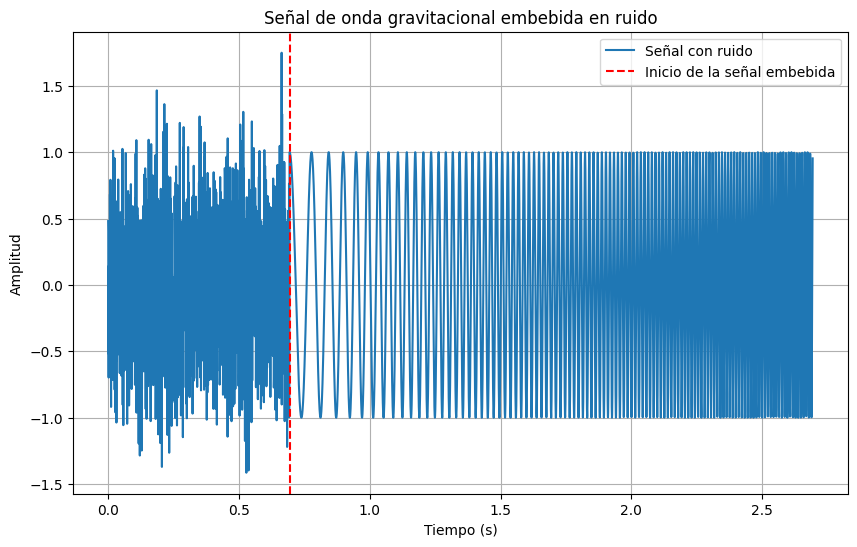

In [ ]:
# Cargar una señal de ejemplo (cambia el número según la señal que desees graficar)
signal_data = np.loadtxt('signal_0.csv', delimiter=',')
R_value = float(open('R_0.txt', 'r').readline())
start_time = float(open('start_time_0.txt', 'r').readline())

# Tiempo para la señal
sample_rate = 2048
time = np.arange(0, len(signal_data)/sample_rate, 1/sample_rate)

# Graficar la señal
plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label='Señal con ruido')
plt.axvline(start_time, color='red', linestyle='--', label='Inicio de la señal embebida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de onda gravitacional embebida en ruido')
plt.legend()
plt.grid(True)
plt.show()

## Sliding Window

In [ ]:
!pip install giotto-tda

In [ ]:
from gtda.time_series import SingleTakensEmbedding
import plotly.express as px


max_embedding_dimension_periodic = 3 # no pasarse de 500
max_embedding_time_delay_periodic = 20
stride = 15

embedder_periodic = SingleTakensEmbedding(
parameters_type="search",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(signal_data)


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud

plot_point_cloud(y_periodic_embedded)
# signal_data

Shape of embedded time series: {y_periodic_embedded.shape}


## PCA

In [ ]:
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud


pca = PCA(n_components=3)
y_embedded_pca = pca.fit_transform(y_periodic_embedded)

plot_point_cloud(y_embedded_pca)

In [ ]:
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud


pca = PCA(n_components=2)
y_embedded_pca = pca.fit_transform(y_periodic_embedded)

plot_point_cloud(y_embedded_pca)

## Algoritmo Mapper

In [1]:
from generate_datasets import make_gravitational_waves
from pathlib import Path

R = 0.65
n_signals = 1500
DATA = Path(".")

noisy_signals, gw_signals, labels, Rcoeflist = make_gravitational_waves(
    path_to_data=DATA, n_signals=n_signals, r_min=0.075, r_max=R, n_snr_values=3
)

print(f"Number of noisy signals: {len(noisy_signals)}")
print(f"Number of timesteps per series: {len(noisy_signals[0])}")

Number of noisy signals: 1500
Number of timesteps per series: 8692


In [2]:
import kmapper as km
import sklearn
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Rcoeflist = np.array(Rcoeflist)
gw_signals = np.array(gw_signals)

mapper = km.KeplerMapper(verbose=1)

graph = mapper.map(
    Rcoeflist,
    gw_signals,
    clusterer=sklearn.cluster.DBSCAN(metric='euclidean'),
    cover=km.Cover(n_cubes=6, perc_overlap=0.05),
)

mapper.visualize(
    graph,
    path_html="ondasGravitacionales.html",
    title="Ondas Gravitacionales",
    colorscale=None,
    nbins=8,
    custom_tooltips = Rcoeflist,
    node_color_function=['mean','std','median','max']
    )

km.draw_matplotlib(graph)

KeplerMapper(verbose=1)
Mapping on data shaped (1500, 8192) using lens shaped (1500,)

Creating 6 hypercubes.


C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Created 1 edges and 4 nodes in 0:00:01.826394.
Wrote visualization to: ondasGravitacionales.html
no display found. Using non-interactive Agg backend
